In [4]:
PROJECT_ROOT = '..'
CSV_FOLDER = 'csv'

%run _utils.ipynb

issues = load_issues()
library_versions = load_library_versions()
package_releases_and_breaks = load_package_releases_and_breaks()


## How many of all patch/min/major updates of providers break a client's build?

NOTE: This does not consider the number of breaks a release has.
i.e. If a package has 5 minor releases, and only 1 release broke 4 clients, the minor_ratio for that package will be 1/5, or only 1 breaking release.

In [12]:
print('Five number summary of different ratio types')
package_releases_and_breaks[['total_ratio', 'major_ratio', 'minor_ratio', 'patch_ratio']].describe()

Five number summary of different ratio types


,total_ratio,major_ratio,minor_ratio,patch_ratio
count,7341.000000,5511.000000,6719.000000,7296.000000
mean,0.062204,0.008828,0.067615,0.067847
std,0.099584,0.050063,0.159809,0.129452
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.031250,0.000000,0.000000,0.017241
75%,0.078947,0.000000,0.062500,0.083333
max,1.000000,1.000000,1.000000,1.000000


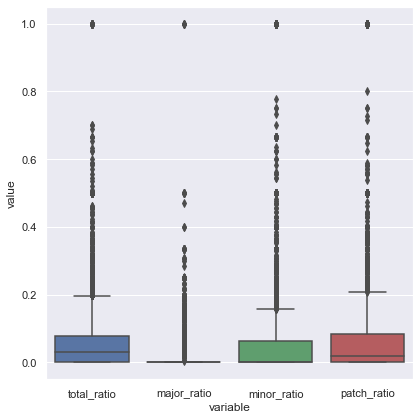

In [15]:
melted = pd.melt(
    package_releases_and_breaks,
    id_vars =['package'],
    value_vars =['total_ratio', 'major_ratio', 'minor_ratio', 'patch_ratio']
)

sns.set()
fig, ax_1 = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))

params = dict(
    data=melted,
    x='variable',
    y='value',
)
ax_1 = sns.boxplot(
    **params,
    ax=ax_1
)

fig.tight_layout()
plt.show()

In [27]:
breaking_library_versions = \
    library_versions[library_versions['broken_clients_count'] > 0]\
    .sort_values(by=['broken_clients_count'], ascending=False)

issue_columns = [
    'issue_id',
    'issue_url',
    'issue_title',    
]
library_columns = [
    'package_name',
    'version',
]

result = {
    'issue_id': list(),
    'issue_url': list(),
    'issue_title': list(),
    'package_name': list(),
    'version': list(),
}


def get_breaking_issues(package, version):
    breaking_issues = issues.loc[
        (issues['issue_dependency_name'] == package) &
        (issues['issue_dependency_next_version'] == version)
    ]
    return breaking_issues[issue_columns]


for idx, row in breaking_library_versions.head(1).iterrows():
    breaking_issues = get_breaking_issues(row['package_name'], row['version'])
    for bi_idx, bi_row in breaking_issues.iterrows():
        result['issue_id'].append(bi_row['issue_id'])
        result['issue_url'].append(bi_row['issue_url'])
        result['issue_title'].append(bi_row['issue_title'])
        result['package_name'].append(row['package_name'])
        result['version'].append(row['version'])


breaking_issue_reports = pd.DataFrame(result)
breaking_issue_reports

,issue_id,issue_url,issue_title,package_name,version
0,451728765,https://api.github.com/repos/pikselpalette/react-progressive-table/issues/12,An in-range update of enzyme is breaking the build 🚨,enzyme,3.9.0
1,451725195,https://api.github.com/repos/ethanneff/react-native-redux-2/issues/53,An in-range update of enzyme is breaking the build 🚨,enzyme,3.9.0
2,451728965,https://api.github.com/repos/FDMediagroep/fdmg-ts-react-player-controls/issues/66,An in-range update of enzyme is breaking the build 🚨,enzyme,3.9.0
3,451727789,https://api.github.com/repos/hisptz/tracker-report-app/issues/149,An in-range update of enzyme is breaking the build 🚨,enzyme,3.9.0
4,451723890,https://api.github.com/repos/Saritasa/react-form/issues/33,An in-range update of enzyme is breaking the build 🚨,enzyme,3.9.0
...,...,...,...,...,...
620,411161373,https://api.github.com/repos/RedTn/react-robust-ui/issues/19,An in-range update of enzyme is breaking the build 🚨,enzyme,3.9.0
621,411160366,https://api.github.com/repos/urbica/ui-kit/issues/89,An in-range update of enzyme is breaking the build 🚨,enzyme,3.9.0
622,411161933,https://api.github.com/repos/YannickFricke/FeedReader/issues/20,An in-range update of enzyme is breaking the build 🚨,enzyme,3.9.0
623,411160344,https://api.github.com/repos/ultimate-ttt/ultimate-ttt/issues/126,An in-range update of enzyme is breaking the build 🚨,enzyme,3.9.0


In [20]:
issues.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123197 entries, 0 to 123196
Data columns (total 21 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   issue_id                         123197 non-null  int64         
 1   issue_number                     123197 non-null  int64         
 2   issue_url                        123197 non-null  object        
 3   issue_title                      123197 non-null  object        
 4   issue_state                      123197 non-null  object        
 5   issue_is_locked                  123197 non-null  bool          
 6   issue_created_at                 123197 non-null  datetime64[ns]
 7   issue_updated_at                 123197 non-null  datetime64[ns]
 8   issue_closed_at                  98341 non-null   datetime64[ns]
 9   issue_user_login                 123197 non-null  object        
 10  issue_labels                     123197 non-